# Difference in Palermo Scale between Large and Small Asteroids

### Introduction

Asteroids, meteorites flying through space, are important to track as the ones that have collided with the earth in the past have critically changed the Earth’s biosphere (Yeomans 1998) and its craters have been important analytical tools to explain our solar systems past (AMNH n.a). With the danger that a large asteroid could bring to earth, planetary defence analytics is important, and knowing out to prioritise which near-earth objects to look out for is essential in a time crunch (Yeomans 1998). Our inferential question is whether the magnitude of an asteroid affects the Palermo_Scale of the asteriod. The palermo scale is a logarithmic scale used by astronomers to rate the potential hazard of impact of a near-Earth object. It combines two types of data—probability of impact and estimated kinetic yield—into a single "hazard" value. Given our question, the population of interest will be the asteroids that have currently been prioritised analytically to have a possibility of intersecting with the earth’s trajectory over a 100 year period. Our null hypothesis is that there is no difference in the Palermo scale between large and small asteroids. We will be splitting up the asteroids into two magnitude groups from the data we collected from the Possible Asteroid Impacts with Earth dataset posted on Kaggle.




### Preliminary Results

In [1]:
library(tidyverse)
library(broom)
library(infer)


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
url <- 'https://raw.githubusercontent.com/arulh/STAT-201-project/main/data/impacts.csv'
df <- read.csv(
    url
)

In [3]:
head(df)

,Object.Name,Period.Start,Period.End,Possible.Impacts,Cumulative.Impact.Probability,Asteroid.Velocity,Asteroid.Magnitude,Asteroid.Diameter..km.,Cumulative.Palermo.Scale,Maximum.Palermo.Scale,Maximum.Torino.Scale
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2006 WP1,2017,2017,1,5.2e-09,17.77,28.3,0.007,-8.31,-8.31,0
2,2013 YB,2017,2046,23,7.6e-05,8.98,31.4,0.002,-6.60,-6.96,0
3,2008 US,2017,2062,30,1.6e-05,18.33,31.4,0.002,-6.48,-6.87,0
4,2010 VR139,2017,2076,24,2.0e-07,4.99,26.7,0.016,-6.83,-6.95,0
5,2015 ME131,2017,2096,85,2.3e-08,19.46,19.2,0.497,-3.85,-4.30,0
6,2010 XB73,2017,2110,55,2.8e-07,5.98,22.5,0.110,-5.03,-5.51,0


Here we are creating a new column called asteroid_size. The values are "large" if the Asteroid is larger than the median asteroid magnitude and "small" if smaller or equal to the Median Magnitude. This is needed when coming up with our hypothesis test.

In [4]:
median_magnitude <- median(df$Asteroid.Magnitude)
median_magnitude

df <- df %>%
    mutate(asteroid_size = if_else(df$Asteroid.Magnitude > median_magnitude, 'large', 'small'))

head(df)

[1] 26.4

,Object.Name,Period.Start,Period.End,Possible.Impacts,Cumulative.Impact.Probability,Asteroid.Velocity,Asteroid.Magnitude,Asteroid.Diameter..km.,Cumulative.Palermo.Scale,Maximum.Palermo.Scale,Maximum.Torino.Scale,asteroid_size
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2006 WP1,2017,2017,1,5.2e-09,17.77,28.3,0.007,-8.31,-8.31,0,large
2,2013 YB,2017,2046,23,7.6e-05,8.98,31.4,0.002,-6.60,-6.96,0,large
3,2008 US,2017,2062,30,1.6e-05,18.33,31.4,0.002,-6.48,-6.87,0,large
4,2010 VR139,2017,2076,24,2.0e-07,4.99,26.7,0.016,-6.83,-6.95,0,large
5,2015 ME131,2017,2096,85,2.3e-08,19.46,19.2,0.497,-3.85,-4.30,0,small
6,2010 XB73,2017,2110,55,2.8e-07,5.98,22.5,0.110,-5.03,-5.51,0,small


In [5]:
### Getting Location and Scale Parameters

In [6]:
# Getting the mean Palermo Scale for the two groups (large and small asteroid)

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}



mean_values <- df %>%
    group_by(asteroid_size) %>%
    summarize(sample_size = n(),
            mean_Palermo_Scale = mean(Maximum.Palermo.Scale),
             median_Palermo_Scale = median(Maximum.Palermo.Scale),
             mode_Palermo_Scale = getmode(Maximum.Palermo.Scale),
             twenty_fifth_percentile = quantile(Maximum.Palermo.Scale, probs = .25),
             seventy_fifth_percentile = quantile(Maximum.Palermo.Scale, probs = .75),
             standard_deviation = sd(Maximum.Palermo.Scale),
             inter_quartile_range_50 = seventy_fifth_percentile - twenty_fifth_percentile)

mean_values


asteroid_size,sample_size,mean_Palermo_Scale,median_Palermo_Scale,mode_Palermo_Scale,twenty_fifth_percentile,seventy_fifth_percentile,standard_deviation,inter_quartile_range_50
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
large,340,-7.269176,-7.25,-7.50,-8.0825,-6.35,1.335189,1.7325
small,343,-6.342915,-6.34,-6.43,-7.3100,-5.38,1.466209,1.9300


In [7]:
## Getting Histogram for both large and small asteroids

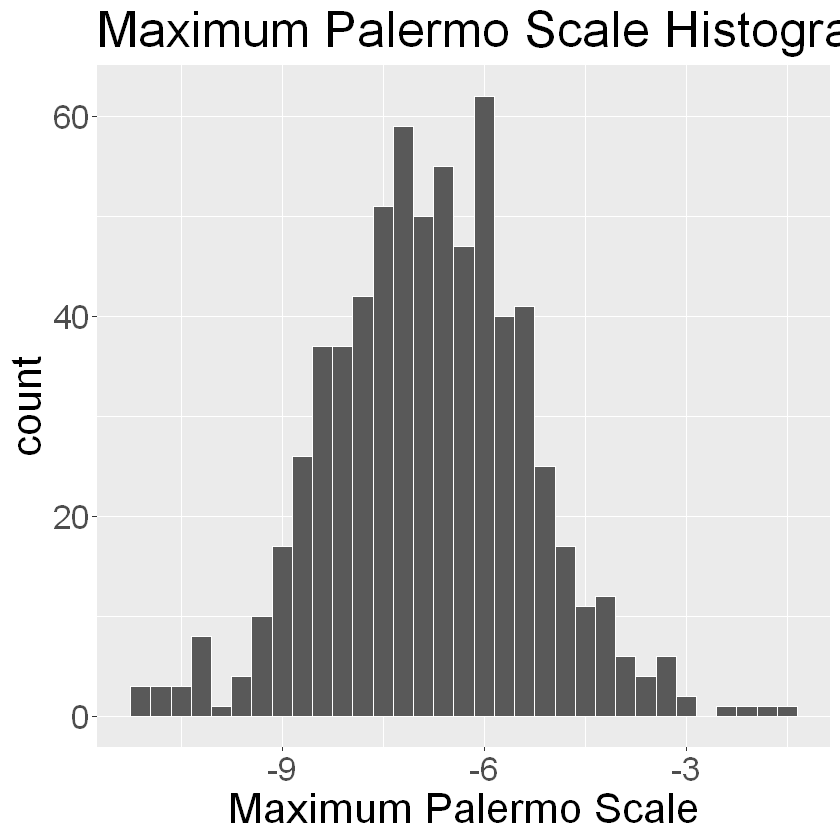

In [8]:
histogram <- 
    df %>% 
    ggplot() + 
    geom_histogram(aes(x=Maximum.Palermo.Scale), binwidth = 0.3, color="white") +
    xlab("Maximum Palermo Scale") + 
    theme(text = element_text(size=25)) + 
    ggtitle("Maximum Palermo Scale Histogram")

histogram

In [9]:
## Getting Boxplot for both large and small asteroids

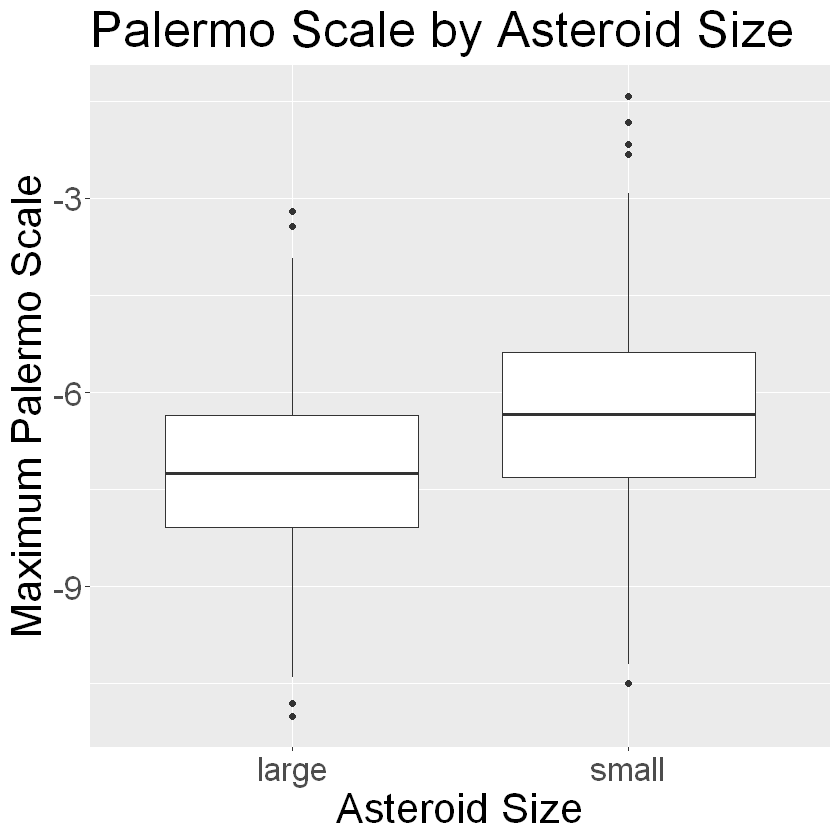

In [10]:
boxplots <- 
   df %>%  
   ggplot(aes(x = asteroid_size, y = Maximum.Palermo.Scale)) + 
   geom_boxplot() + 
   ylab("Maximum Palermo Scale") +
   ggtitle("Palermo Scale by Asteroid Size") +
    xlab("Asteroid Size") +
   theme(text = element_text(size=25))

boxplots

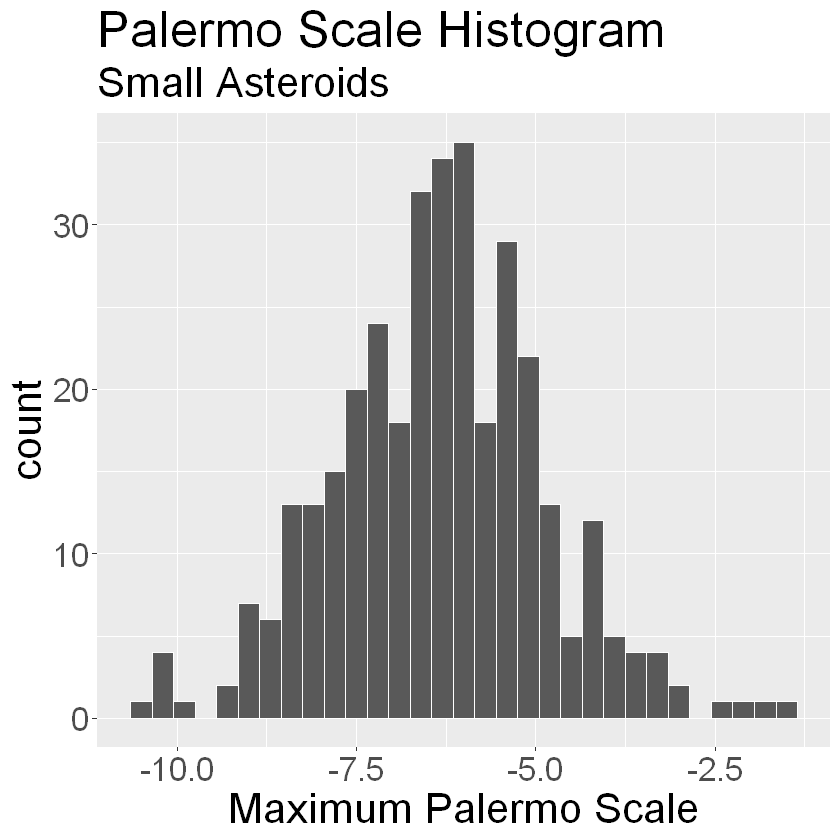

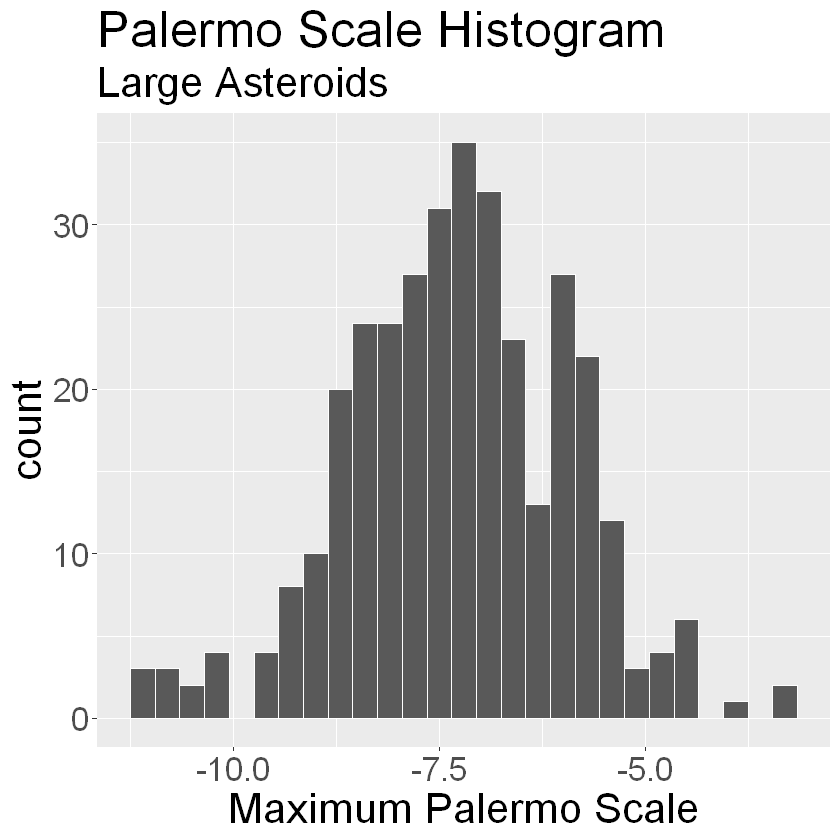

In [11]:
histogram_small_asteroid <- 
    df %>% 
    filter(asteroid_size == "small") %>%
    ggplot() + 
    geom_histogram(aes(x=Maximum.Palermo.Scale), binwidth = 0.3, color="white") +
    xlab("Maximum Palermo Scale") + 
    theme(text = element_text(size=25)) + 
    ggtitle("Palermo Scale Histogram", subtitle = "Small Asteroids")


histogram_large_asteroid <- 
    df %>% 
    filter(asteroid_size == "large") %>%
    ggplot() + 
    geom_histogram(aes(x=Maximum.Palermo.Scale), binwidth = 0.3, color="white") +
    xlab("Maximum Palermo Scale") + 
    theme(text = element_text(size=25)) + 
    ggtitle("Palermo Scale Histogram", subtitle = "Large Asteroids")

histogram_small_asteroid
histogram_large_asteroid



In [12]:
### Bootstrap Distribution

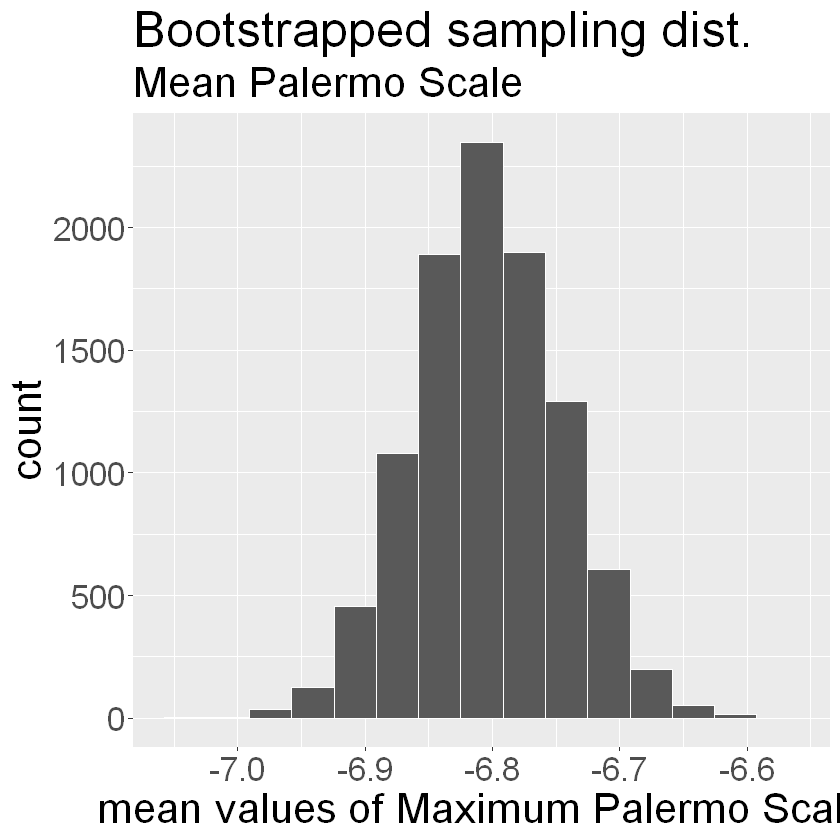

In [13]:
sample_dist <- 
    df %>% 
    specify(response = Maximum.Palermo.Scale) %>% 
    generate(type = "bootstrap", reps = 10000) %>% 
    calculate(stat = "mean")

bootstrap_dist <- 
    sample_dist %>% 
    ggplot() + 
    geom_histogram(aes(x=stat), bins = 15, color="white") +
    xlab("mean values of Maximum Palermo Scale") + 
    theme(text = element_text(size=25)) + 
    ggtitle("Bootstrapped sampling dist.", subtitle = "Mean Palermo Scale")
# your code here

bootstrap_dist

From the maximum Palermo scale of large and small asteroids, we will perform a hypothesis test to conclude whether the large asteroid has a larger chance of impact on the earth than smaller asteroids:

The two hypothesis are:

- $H_0: \mu_{large} - \mu_{small} = 0$
- $H_0: \mu_{large} - \mu_{small} > 0$

Since the asteroids are different and independent of each other, we will be performing a two-sample t-test on each large or small asteroids.


### Methods

The Palermo scale was chosen as the metric because it quantifies the relative risk of a NEO over a period of time. It is trustworthy because it is widely recognized by NEO specialists as the predominant metric for quantifying the level of concern. <br>
The Sentry system used to monitor potential asteroid collisions is less accurate at calculating the elliptical path and the trajectory of the smaller asteroids. This may result in the group with the small asteroids not being a good representation of the true risk represented by the Palermo scale. <br>
We expect to find a higher Palermo scale for asteroids with higher magnitude. This could help analysts more quickly recognize possible harmful asteroids vs benign ones based purely on magnitude. This leads to further questions such as what other parameters influence the Palermo scale, and could this analysis apply to other objects floating above Earth, like the 100 trillion trash and satellites (Kluger 2023), that have an equal chance of colliding and causing damage to Earth?


### References

Kluger, Jeffrey. “Scientists Sound Alarm over a Growing Trash Problem in Space.” Time, Time, 13 Mar. 2023, <br> https://time.com/6262389/space-junk-increasing-problem/.  

“Why Study Impact Craters?: AMNH.” American Museum of Natural History, https://www.amnh.org/exhibitions/permanent/meteorites/meteorite-impacts/earth-impacts/why-study-impact-craters#:~:text=Craters%20are%20windows%20into%20the,geological%20history%20of%20those%20bodies.   

Yeomans, Donald K. “Why Study Asteroids?” NASA, NASA, April. 1998, https://ssd.jpl.nasa.gov/sb/why_asteroids.html#:~:text=The%20scientific%20interest%20in%20asteroids,Earth's%20biosphere%20in%20the%20past.   
